Plik cached_PCA_VARIANCES_d01_comparison_I350_ababdfc56dfbc4e04d4032b9a0c051c83a5e728f.txt nie istnieje.
Nowy plik cached_PCA_VARIANCES_d01_comparison_I350_ababdfc56dfbc4e04d4032b9a0c051c83a5e728f.txt


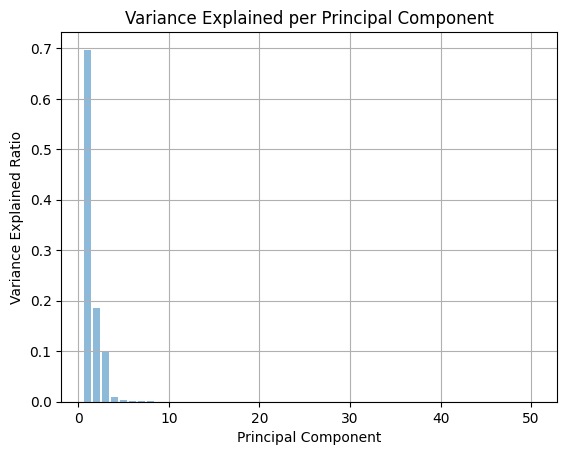

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from FileSystemCache import FileSystemCache
from sklearn.metrics import accuracy_score

# Kmeans on Xdr from pca
if __name__ == '__main__':
    #fname = 'd01_frame_I300'
    fname = 'd01_comparison_I350'
    record = np.load(f'{fname}.npz')
    
    data = record['data']

    X = np.reshape(data, (-1, data.shape[-1]))


    pcaModel = PCA(n_components=50)
    variance_ratio_closure = lambda: pcaModel.fit(X).explained_variance_ratio_
    explained_variance_ratio = FileSystemCache(variance_ratio_closure, f"cached_PCA_VARIANCES_{fname}") \
        .set_dependencies(X, pcaModel.get_params()) \
        .execute()

    plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained Ratio')
    plt.title('Variance Explained per Principal Component')
    plt.grid(True)
    plt.show()
    